# Reduccion de dimensionalidad (dimensionality reduction).

* Es uno de los metodos no supervisados mas imporatantes.
* Interpretacion: Tener un conjunto en 12 dimensiones (por ejemplo) no ayuda mucho cuando no se pueden ni siquiera graficar. Reducir un conjunto de 12 a 2 dimensiones sin afectar mucho el significado es valioso, en terminos de interpreatcion, de velocidad de proceso y de almacenamiento.

* Existe algo llamado
[curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality) que menciona el hecho de que cuando las dimensiones crecen los datos se "pierden" cada vez mas en un espacio cada vez mas inmenso.

* Es curioso que mientras en SVM nosotros tomamos nuestros datos a una dimension mayor (para buscar separacion lineal). En esta seccion nos enfocamos en "tumbar" dimensiones.


## Proyectar: Nos referirmos a la siguiente grafica.



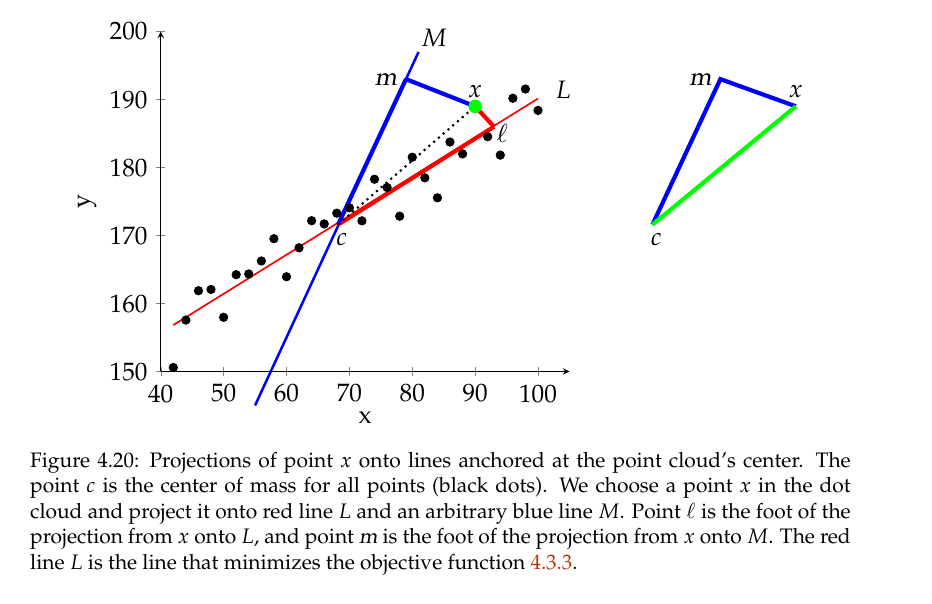

* El centro $c$ es es centro geometrico de los datos (puntos negros)
* El punto $x$ (verde) es un punto arbitrario de nuestros datos.
* Generamos una linea arbitraria $L$, pasando por el puntos $c$. La linea azul.
*  Desde el punto verde $x$ queremos calcular la distancia (perpendicular) a la recta azul $L$.
* Hallamos la proyeccion del punto $x$ sobre la linea $L$. Es el vector $m-c$ (que une los puntos $c$ con $m$.
* La linea verde en el triangulo separado une $x$ con el centro de masa. $d(x,m)$.

El triangulo que se ve a la derecha es rectangulo y por el el teorema de pitagoras tenemos.

$$ d(x,c)^2 = d(x,m)^2 + d(m,c)^2 .$$
Sin perdida de generalidad podemos normalizar los datos de forma que $c$ sea el origen $O$.  En este caso podemos escribir esta ecuacion como.

$$ \| x\|^2 = \| x-m \|^2 + \| m \|^2  \tag{1} .$$

Para que estamos haciendo todo esto?
Quisieramos minimizar las distancias de todos los puntos a la linea azul, que es una linea movil que esta rotando.
Para esto formulamos la funcion objetivo.


$$J_0 (\theta) = \sum_{i=1}^m \| x_i - m_i \|^2 .$$
La linea $L$ no la conocemos, solo sabemos que pasa por el centro $c$ (que ahora es 0). Pero esta linea depende del angulo $\theta$.






La
[animacion](https://drive.google.com/file/d/1Uv5_PXDJ-KRV7qZMqZzdOs1jzblcTipq/view) hecha con un programa en
[Matlab](https://gist.github.com/anonymous/7d888663c6ec679ea65428715b99bfdd#file-pca_animation-m).

* La maginitud $\| x \|$, ,no depende del angulo $\theta$ de la linea.
Entonces, en la Ecuacion (1) hay "trade off" (compromiso) entre los dos termnos de la derecha ($ \| x_i - m \|^2$, $\| m_i \|^2)$. Esto significa que entra mas crezca uno, mas decrece el otro.

Entonces podemos definir una nueva funcion objetivo. La minimizacion de $\| x_i - m \|^2$ es igual la maximizacion de $\| m_i \|^2$



Podemos escribir una nueva funcion objetivo la cual queremos maximizar.

$$J(\theta) = \sum_{i=1}^m \| m_i \|^2 .$$
Interpretemos esta funcion objetivo. Los $\| m_i \|$
son las proyecciones de los puntos sobre la recata "movil". Maximiar esta suma es lo mismo que buscar la **maxima variacion**, o **maxima varianza**.


Las proyecciones $\| m_i \|$ las podemos calcular con lo que desarrollamos en el capitulo de Algebra Lineal.

La proyeccion de $x$ sobre la linear $L$ con direccion $u=(\cos \theta, \sin \theta)$, esta dada por


$$m_i = \langle x_i , u \rangle u = (x_i \cdot u) u   .$$

Entonces

$$\| m_i \|^2 = (x_i \cdot u )^2 .$$

Llevemos este problema a una forma matricial.

Primero tomemos todos datos (puntos negros) como un vector $X$.


$$ X = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_m \end{pmatrix}. $$

El estudiante puede verificar que


$$ J(\theta) = \| X u \|^2 = u^T X^T X u = \langle Xu , Xu \rangle. \tag{2}$$

La funcion objetivo $J(\theta)$ esta maximizando la varianza de los puntos a lo largo de la linea $L$ con angulo de jiro $\theta$.

La matriz $X^T X$ se llama **matriz de covarianza de los datos**.
La ecuacion (2) es el cociente de Rayleigh de la matriz de covarianza $X^T X$.
Probamos, en su momento, que el maximo del cociente de Rayleight esta representado por el mayor autovalor $\lambda_1$.  Es decir


$$\max_{\theta} J(\theta) = \lambda_1 .$$
O sea que el autovalor maximo $\lambda_1$ de la matriz de covarianza mide la maxima disperion (varianza) de los datos y esta esta a lo largo de la direcion del autovector correspondiente al autovalor $\lambda_1$.







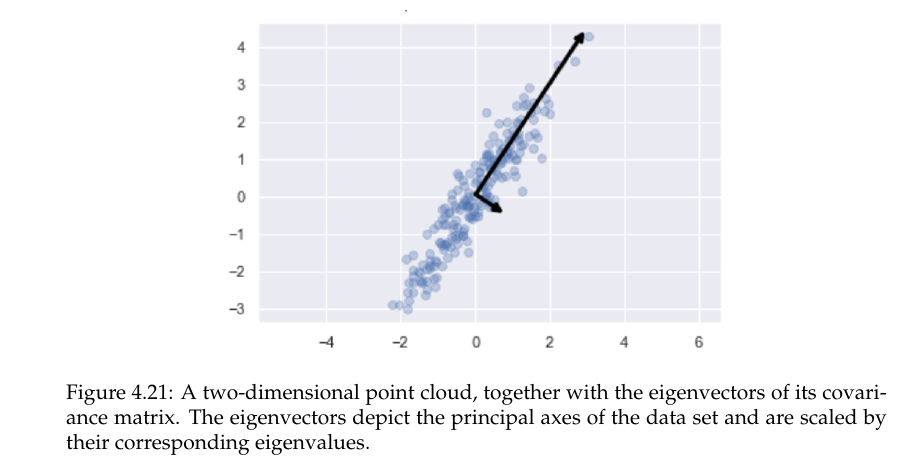

Ahora pendemos en las demas dimensiones, o sea el espacio ortogonal a $u_1$ donde $u$ es el autovector correspondiente a $\lambda_1$. Es decir, al espacio $u_1^{\perp}$.

Volemos a resolver el problema pero ya en este espacio perdendicular.

Hallar

$$R(A, u) = \max_{\| u \|=1, u \perp u_1} u X^T X u .$$
Al resolver esto encontramos el segundo autovalor $\lambda_2$ con un autovector $u_2$.  A este metodo de econtrar autovalores se le llama el
[Courant minimax princpiple](https://en.wikipedia.org/wiki/Courant_minimax_principle#:~:text=In%20mathematics%2C%20the%20Courant%20minimax,is%20named%20after%20Richard%20Courant.)

Que tiene que ver el analisis que hicimos con PCA y SVD?
PCA=principal component analysis.

Veamos la relacion con SVD.
Sea $X=U \Lambda V^T$ la descomposicion SVD de los datos.


$$ X^T X = (V  \Lambda^T U^T)(U \Lambda V^T) V  = V \Lambda^2 V^T$$
donde $\Lambda^2 = \Lambda^T \lambda$ es la matriz con autovalores de $X^T X$, dado que $\Lambda^2$ es una matriz diagonal de tamanho $n \times n$.

Vemos entonces que $V$ constituye los autovectores de la matriz de covarianza
$\Sigma= X^T X$.

En este momento podemos decir que los autovectores, columnas de $V$ representan las componentes principales de los datos $X$. Podemos alinear los valores singulares de $X$ (la diagonal de la matriz $\Lambda^2$ de mayor menor, como lo hemos hecho y buscar un umbral donde cortar.

Recuerden:

* $\lambda_1$ mide la dispercion (varianza) de los datos a lo largo de la direcion $V_1$.
* $\lambda_2$ mide la dispercion (varianza) de los datos a lo largo de la direcion $V_2$.
* y asi suscesivamente.

Debemos elejir un $k$ de forma que a partir de este $k$ no nos importen las demas dimensiones, por que son irrelevantes o generan poco error.
Por decir algo si apartir de $k=5$ los valores singulares $\lambda_i^2$, $i >k$, son 0, entonces no hay informacion en esta direccion y se pueden suprimir todas esas dimensiones. Pero, aun si no 0 pero es muy pequenho, tambien suprimir estas dimensiones.

Una vez escojamos $k$ (el nuevo numero de dimensiones) construimos la matriz truncada (a $k$)

$$W=[V_1 | V_2 | \cdots V_k]  .$$
Ahora proyectamos cada punto $x_j$ a lo largto de estas direcciones.
Los tamanhos de esas proyecciones son

$$z_{ji} = \langle x_j, v_i \rangle \quad , j=1, \cdots, m , \quad i=1, \cdots , k .$$
Esta matriz la escribimos en forma matricial como


$$Z = X W . \tag{2} $$
Analicemos las dimensiones. $X \in \mathbb{R}^{m \times n}$ . Se supone que $n$ es un muy grande (de dimensiones), pero ahora $Z \in \mathbb{R}^{m \times k}$.
La idea es que $k \ll n$.

$Z$ es una aproximacion (proyeccion) de $X$ sobre las components principales $V_i$.

Volvamos al ejemplo donde proyectamos de 2D a 1D.

En Ecuacion (2) multiplicamos a ambos lados for $W^T$, obtenemos


$$ Z W^T = X W W^T .$$
Si $W W^T = I$ **nada se pierde** y $X= Z W^T$. Pero
si no, se pierde la contribucion de las componentes $V_{k+1}, V_{k+2}, \cdots, V_{n}$.

* se pierde **nada** cuando los valores singulares son $\sigma_{k+1}=\sigma_{k+2} = \cdots \sigma_n = 0$

* se pierde poco cuando estos valores singulares son pequenhos. Por eso de definie el umbral ($\sigma_i < \epsilon$ $i=k+1, k+2, \cdots n$, $\epsilon=10^{-8}$.

## Resumen.
Algoritmo de reduccion de dimensionalidad.

* Con los puntos (datos, vectores, puntos negros) construya la matriz $X$.
* Luego haga SVD.
* Estudie las direcciones principales, los autovectores de $X^X$ (matriz de covarianza de los datos) y los valores singulares $\sigma_i^2 = \lambda_i^2$.
Defina un punto de corte (humbral).
* Construya la matriz reducida $W=[V_1 | V_2 | \cdots V_k]$. Asumimos que si el umbral es $\epsilon$, $\sigma_i^2 < \epsilon$, $i=k+1, k+2, \cdots n$.
* Proyecte los datos $X$ (en el espacio $n$ dimensional) al nuevo espacio $k$-dimensional, mediante $Z= X W$. Construir los puntos naranja en la ultima grafica.


Si se quiere "reconstruir" el $X$ (pasar de naranja a azul)
* Backprojection (proyectar hacia atras).

$$ X_{rec} = Z W^T .$$
La reconstruccion es total si $\sigma_i=0$, $i=k+1, k+2, \cdots, n$,
o parcial si $\sigma_i > 0$ para algunos $i=k+1, k+2, \cdots, n$.



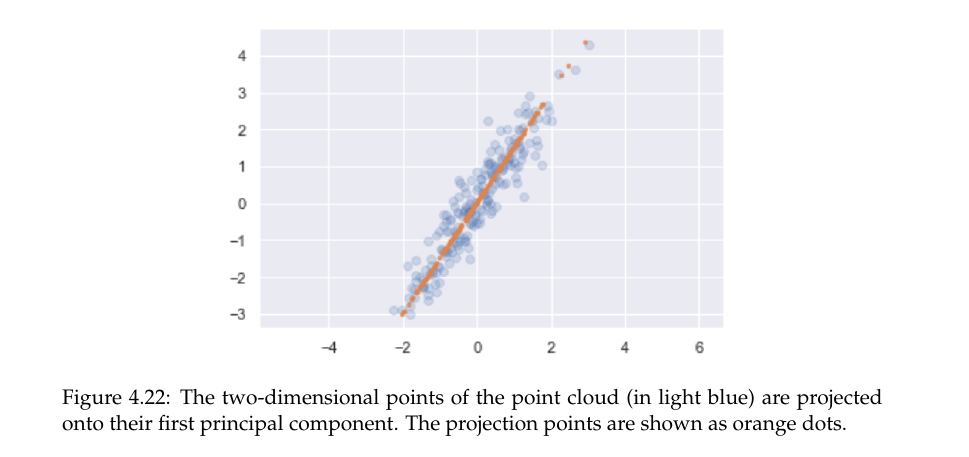

En este ejemplo pasamos de 2D (puntos azules) a 1D (puntos naranja)

# Como recobramos los puntos desde $Z$.
Esto lo necesitariamos para compresion de datos (la tarea).

